## Testing how the general classifier will perform on the Churn_Modelling Test:
- The dataset contains 10 000 records of bank customers
- Every sample contains 12 features and information whether the customer churned the bank or not
- The General Classifier Network will have the size of 12 inputs and 2 hidden layes, each with 20 cells
- It will train for 5 epochs on the data
- Next will display the learning rate graphed against time and the confusion matrix
- At the end will compare the result to the standard (gradient descent) ANN Adam (from keras)

In [1]:
import numpy as np
import random
import time
import utils
import matplotlib.pyplot as plt
from networkMod import Network
import matplotlib.patches as mpatches
from utils import println
import pandas as pd
from sklearn.metrics import confusion_matrix

In [2]:
# - Importing the dataset
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

# - Encoding categorical data
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
# - Taka care of the dummy variable trap:
X = X[:, 1:]

# - Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

# - Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:371: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:392: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


In [19]:
# - Initiate the classifier:
input_size = len(X_test[0])
hidden_count = 2
hidden_size = 20
output_size = 2
stupid_reward = 0 # use weighted reward by default
print()
print("Creating a network...")
sampleNetwork = Network(input_size,
                        hidden_size,
                        output_size,
                        hidden_count)
time.sleep(0.5)
print("Done!")
print(sampleNetwork)


# - Prepare the grapth data:
accuracy = []
step = []
Fps  = []
Fns  = []
learning_rate = []
learning_rate.append(accuracy)
learning_rate.append(step)
learning_rate.append(Fps)
learning_rate.append(Fns)


# - Traing the model:
println(5)
epochs = 5
for epoch_numb in range(epochs):
    print()
    print("Epoch:", epoch_numb+1)
    y_pred = []
    score_list = [0]*100
    for test_numb in range(len(X_train)):
        # - Get input:
        X_train[test_numb]
        input_ = X_train[test_numb]
        
        # - Input to the neural net:
        sampleNetwork.getInputAndPropagate(input_)
        
        # - Get the output:
        output = sampleNetwork.returnOutputPlace()
        y_pred.append(output)
        
        # - Compare with the y_train output:
        if stupid_reward == 1:
            if y_train[test_numb] == output:
                feedback =  0.5
            else:
                feedback = -0.5
        elif stupid_reward == 0:
            if y_train[test_numb] == 1:
                # Max punishment for false positives (max=0.5)
                if output == 1:
                    feedback = 0.5
                else:
                    feedback = -0.5
            if y_train[test_numb] == 0:
                # Adjust smart reward here:
                if output == 0:
                    feedback = 0.16
                else:
                    feedback = -0.16
        
        # - Feedback(Reward):
        sampleNetwork.rewardAndUpdate(feedback)

        # - Calculate score (% of right answers):
        if feedback > 0:
            new_score = 1
        else:
            new_score = 0
        score_list.append(new_score)
        score_list.pop(0)

        # - Every Nth turn:
        Nth_turn = 1000
        if test_numb % Nth_turn == 0 and test_numb != 0 and test_numb != Nth_turn:
        
            # Conf matrix:
            cm = confusion_matrix(y_train[:len(y_pred)], y_pred)
            total_error = (cm[1][0]+cm[0][1]) / np.sum(cm)
            false_positives = cm[1][0]/ (cm[1][0]+cm[1][1])
            false_negatives = cm[0][1]/ (cm[0][0]+cm[0][1])
        
            correctness = np.mean(score_list)
        
            # - Append the learning rate list:
            learning_rate[0].append(total_error)
            try:
                learning_rate[1].append(np.mean(learning_rate[1][-1]+Nth_turn))
            except:
                learning_rate[1].append(0)
            learning_rate[2].append(false_positives)
            learning_rate[3].append(false_negatives)
                
            # - Print data:
            print("Samples done:", test_numb, " total accuracy:", 1-total_error, " false positives:", false_positives)
            #print("- False positives %:", false_positives*100)
            #print("- False negatives %:", false_negatives*100)
            
            '''
            plt.xlabel('Training sample')
            plt.ylabel('Correctness')
            plt.plot(learning_rate[1], learning_rate[0], color="green")
            plt.plot(learning_rate[1], learning_rate[2], color="red")
            plt.plot(learning_rate[1], learning_rate[3], color="blue")
            green_line = mpatches.Patch(color='green', label='Total Error')
            red_line = mpatches.Patch(color='red', label='False Positives')
            blue_line = mpatches.Patch(color='blue', label='False Negatives')
            plt.legend(handles=[green_line, red_line, blue_line])
            plt.show()
            '''


Creating a network...
Done!
R: 11 -> 2x20 -> 2
 
 
 
 
 

Epoch: 1
Samples done: 2000  total accuracy: 0.6906546726636682  false positives: 0.7264150943396226
Samples done: 3000  total accuracy: 0.7134288570476508  false positives: 0.7492063492063492
Samples done: 4000  total accuracy: 0.7298175456135966  false positives: 0.7609756097560976
Samples done: 5000  total accuracy: 0.7386522695460908  false positives: 0.7776679841897233
Samples done: 6000  total accuracy: 0.7390434927512082  false positives: 0.7709179528838342
Samples done: 7000  total accuracy: 0.7394657906013427  false positives: 0.7690692792162351

Epoch: 2
Samples done: 2000  total accuracy: 0.7246376811594203  false positives: 0.4669811320754717
Samples done: 3000  total accuracy: 0.7150949683438854  false positives: 0.4714285714285714
Samples done: 4000  total accuracy: 0.7163209197700575  false positives: 0.49390243902439024
Samples done: 5000  total accuracy: 0.7226554689062188  false positives: 0.5237154150197628
S

## The learning graph:

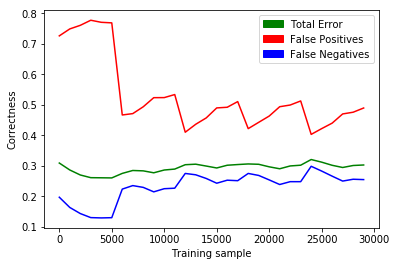

In [21]:
plt.xlabel('Training sample')
plt.ylabel('Correctness')
plt.plot(learning_rate[1], learning_rate[0], color="green")
plt.plot(learning_rate[1], learning_rate[2], color="red")
plt.plot(learning_rate[1], learning_rate[3], color="blue")
green_line = mpatches.Patch(color='green', label='Total Error')
red_line = mpatches.Patch(color='red', label='False Positives')
blue_line = mpatches.Patch(color='blue', label='False Negatives')
plt.legend(handles=[green_line, red_line, blue_line])
plt.show()

## Evaluating on the test set:

In [22]:
y_pred = []
score_list = [0]*100
for test_numb in range(len(X_test)):
    # - Get input:
    X_test[test_numb]
    input_ = X_test[test_numb]
    
    # - Input to the neural net:
    sampleNetwork.getInputAndPropagate(input_)
    
    # - Get the output:
    output = sampleNetwork.returnOutputPlace()
    y_pred.append(output)
    
    # - Compare with the y_train output:
    if y_test[test_numb] == output:
        feedback = 0.5
    else:
        feedback = -0.5
    
    # - Continue learning through the test set?:
    #sampleNetwork.rewardAndUpdate(feedback)
    
    # - Calculate score (% of right answers):
    if feedback == 0.5:
        new_score = 1
    else:
        new_score = 0
    score_list.append(new_score)
    score_list.pop(0)
    
    # - print every 100 turns:
    if test_numb % 100 == 0:
        correctness = np.mean(score_list)
        print(test_numb)

print("Tested network:")
print(sampleNetwork)
print("- Trained for", epochs, "epochs")
print()
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
print()
print("Correct answers in %:", ((cm[0][0]+cm[1][1])/2000.)*100)
print("-  False negatives %:", (cm[0][1] / (cm[0][1]+cm[0][0]))*100)
print("-  False positives %:", (cm[1][0] / (cm[1][1]+cm[1][0]))*100)
print()

0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
Tested network:
R: 11 -> 2x20 -> 2
- Trained for 5 epochs

Confusion matrix:
[[1139  456]
 [ 199  206]]

Correct answers in %: 67.25
-  False negatives %: 28.589341692789972
-  False positives %: 49.135802469135804



Lets compare that with the standard ANN adam learning:

In [23]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11))

# Adding the second hidden layer
classifier.add(Dense(units = 20, kernel_initializer = 'uniform', activation = 'relu'))

# Adding the output layer
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
classifier.fit(X_train, y_train, batch_size = 10, epochs = 5)

# Part 3 - Making predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print("- Trained for", epochs_numb, "epochs")
print()
cm = confusion_matrix(y_test, y_pred)
print("Confusion matrix:")
print(cm)
print()
print("Correct answers in %:", ((cm[0][0]+cm[1][1])/2000.)*100)
print("-  False negatives %:", (cm[0][1] / (cm[0][1]+cm[0][0]))*100)
print("-  False positives %:", (cm[1][0] / (cm[1][1]+cm[1][0]))*100)
print()

Epoch 1/5
8000/8000 [==============================] - 1s 95us/step - loss: 0.4922 - acc: 0.7956
Epoch 2/5
8000/8000 [==============================] - 0s 62us/step - loss: 0.4548 - acc: 0.8051
Epoch 3/5
8000/8000 [==============================] - 0s 61us/step - loss: 0.4480 - acc: 0.8174
Epoch 4/5
8000/8000 [==============================] - 1s 63us/step - loss: 0.4440 - acc: 0.8202
Epoch 5/5
8000/8000 [==============================] - 1s 63us/step - loss: 0.4405 - acc: 0.8207
- Trained for 10 epochs

Confusion matrix:
[[1533   62]
 [ 300  105]]

Correct answers in %: 81.89999999999999
-  False negatives %: 3.8871473354231973
-  False positives %: 74.07407407407408



## Comparing the results:
- Both networks are of same size (2x10) and trained for 5 epochs


### Standard ANN Adam:
- Correct answers in %: 81.89999999999999
- False negatives %: 3.8871473354231973
- False positives %: 74.07407407407408


### The General Classifier:
- Correct answers in %: 67.25
- False negatives %: 28.589341692789972
- False positives %: 49.135802469135804

### Quick notes:
- The General Classifier give less correct answers in total for the gain of less importaint false negatives
- Given that very small portion of the clients in the data churned, if not tuned (given smart reward) the General Classifier will also quickly learn that it can maximize its reward, by just saying that every client will not churn, except for some trivial examples